In [259]:
import pandas as pd
import numpy as np
import nltk
from nltk import corpus
from nltk.corpus  import gutenberg
from nltk.tokenize import word_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import subjectivity
from nltk.sentiment.util import *
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import sent_tokenize
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [260]:
text = nltk.corpus.gutenberg.words("milton-paradise.txt")
text


['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [261]:
text_sentences = nltk.corpus.gutenberg.sents("milton-paradise.txt")
print(text_sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [262]:

def stop_words(langauge):
    stopword_set = set(nltk.corpus.stopwords.words(language))
    words = ["thus", "thou", "thee", "thy", "and", "by", "the"]
    for stopwords in stopword_set:
        words.append(stopwords)

stop_words("english")

In [263]:
filtered_list = []
for sentence in text_sentences:
    for word in sentence:
        if word.lower() not in stopwords and word.isalnum():
            if len(word) > 2:
                    filtered_list.append(word)
print(filtered_list)

['Paradise', 'Lost', 'John', 'Milton', '1667', 'Book', 'Man', 'first', 'disobedience', 'and', 'the', 'fruit', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', 'and', 'all', 'our', 'woe', 'With', 'loss', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'and', 'regain', 'the', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'that', 'the', 'secret', 'top', 'Oreb', 'Sinai', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'Chaos', 'Sion', 'hill', 'Delight', 'thee', 'more', 'and', 'Siloa', 'brook', 'that', 'flowed', 'Fast', 'the', 'oracle', 'God', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', 'That', 'with', 'middle', 'flight', 'intends', 'soar', 'Above', 'Aonian', 'mount', 'while', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme', 'And', 'chiefly', 'thou', 'Spirit', 'that', 'dost', 'prefer', 'Befor

In [264]:
lemmatizer = WordNetLemmatizer()
for word in filtered_list:
    lemmatizer.lemmatize(word)
print(filtered_list)

['Paradise', 'Lost', 'John', 'Milton', '1667', 'Book', 'Man', 'first', 'disobedience', 'and', 'the', 'fruit', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', 'and', 'all', 'our', 'woe', 'With', 'loss', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'and', 'regain', 'the', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'that', 'the', 'secret', 'top', 'Oreb', 'Sinai', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'Chaos', 'Sion', 'hill', 'Delight', 'thee', 'more', 'and', 'Siloa', 'brook', 'that', 'flowed', 'Fast', 'the', 'oracle', 'God', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', 'That', 'with', 'middle', 'flight', 'intends', 'soar', 'Above', 'Aonian', 'mount', 'while', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme', 'And', 'chiefly', 'thou', 'Spirit', 'that', 'dost', 'prefer', 'Befor

In [290]:
from nltk.probability import FreqDist

def featured_list(size):
    fdist = FreqDist(filtered_list)
    top_20 = fdist.most_common(size)
    top_20

featured_list(20)

[('and', 2799),
 ('the', 2505),
 ('with', 876),
 ('all', 604),
 ('And', 596),
 ('from', 543),
 ('that', 536),
 ('not', 527),
 ('their', 484),
 ('The', 463),
 ('Heaven', 412),
 ('thou', 382),
 ('but', 370),
 ('thy', 339),
 ('thee', 337),
 ('they', 335),
 ('this', 334),
 ('for', 327),
 ('him', 318),
 ('what', 295)]

In [291]:
analyzer = SentimentIntensityAnalyzer()
text = gutenberg.raw("milton-paradise.txt")

In [292]:
sentiment = analyzer.polarity_scores(text)
print(sentiment)

{'neg': 0.134, 'neu': 0.678, 'pos': 0.188, 'compound': 1.0}


In [293]:
text_sentences

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]

In [294]:
print(type(text))

<class 'str'>


In [295]:
sentences = []

for sentence in text_sentences:
    chosen_one = " ".join(sentence)
    sentences.append(chosen_one)

sentences

['[ Paradise Lost by John Milton 1667 ]',
 'Book I',
 "Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .",
 "And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me , for thou know ' st ; thou from the first Wast present , and , with mighty wings outspread , Dove - like sat ' st brooding on the vast Aby

In [296]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_scores = []


analyzer = SentimentIntensityAnalyzer()

for sentence in sentences:
    sentiment = analyzer.polarity_scores(sentence)
    sentiment_scores.append((sentence, sentiment["compound"]))

pos = sorted(sentiment_scores, key = lambda x: x[1], reverse=True)[:5]
neg = sorted(sentiment_scores, key = lambda x: x[1])[:5]
neu = sorted(sentiment_scores, key = lambda x: abs(x[1]))[:5]

#Payton this is correct however god strikes against those who wish to improve and progress and I am his latest victim



TypeError: 'list' object is not callable

Yes they do represent what they are supposed to because the words to correlate to the connotation that we are looking at. Words that we are looking for positive connotation are positive words adn the same goes for words that are neutral and negative.

In [300]:
word = [word[0] for word in top_20]
count = [word[1] for word in top_20]

Text(0.5, 1.0, 'Amount of Common Words')

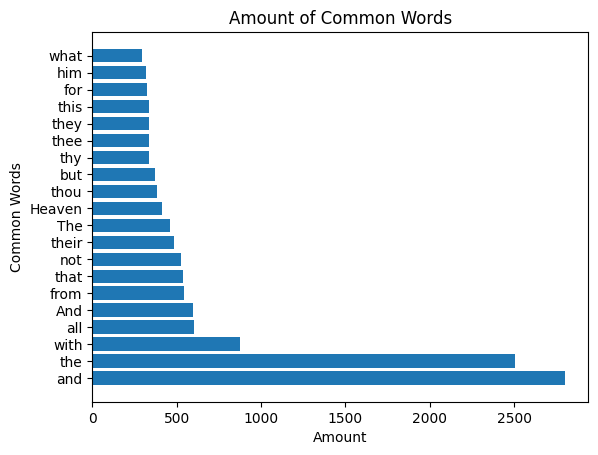

In [301]:
plt.barh(word, count)
plt.xlabel("Amount")
plt.ylabel("Common Words")
plt.title("Amount of Common Words")

I choose lemmentaization because it considers the context of how the word is used and gives a more indepth search for words. Leading to better results when using lemmentaization compared to stemming

In [298]:
pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


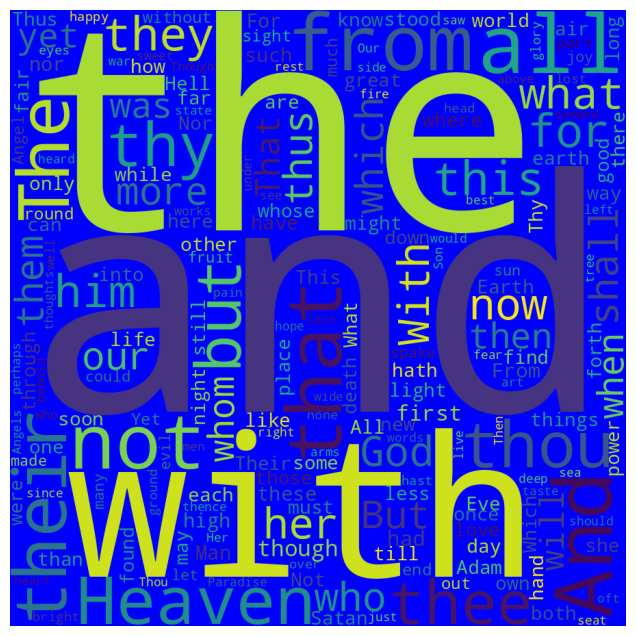

In [299]:
from wordcloud import WordCloud

def wordcloud(w, h, list, color):
    wordcloud = WordCloud(width = w, height = h, background_color = color).generate_from_frequencies(list)

    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

wordcloud(900,900, fdist, "blue")